# Problem Set 4

***Chun-Chien Hsiao***

***cchsiao2@illinois.edu***

### Problem 1

A network consists of a single O-D pair connected by two links. The data for this network are given as follows:

Link 1 Performance: $t_1(x_1)=1+\frac{1}{2}x_1^2$

Link 2 Performance: $t_2(x_2)=3+x_2$

Demand: $q = \frac{5}{u}-1$

Flow Conservation: $q = x_1 + x_2$

where $t_1$ and $t_2$ are the travel time on link 1 and link 2, respectively, $x_1$ and $x_2$ are the flows on these links, $u$ is the (equilibrium) O-D travel time, and $q$ is the O-D flow.

1. Formulate an equivalent minimization problem for finding the equilibrium flow and demand in the network.
    
    We can get the following eqations based on the information we have.
    
    $t_1(x_1) = 1 + \frac{1}{2} x_1^2 \Longrightarrow \int_{0}^{x_1} t_1(\tilde{\omega})d\tilde{\omega} = x_1 + \frac{1}{6}x_1^3; \space \space \space t_2(x_2) = 3 + x_2 \Longrightarrow \int_{0}^{x_2} t_2(\tilde{\omega}) d\tilde{\omega} = 3x_2+\frac{1}{2}x_2^2$
    
    $q = \frac{5}{u}-1 \Longrightarrow u = \frac{5}{q+1} \Longrightarrow \int_{0}^{q} u(\tilde{\omega})d\tilde{\omega} = 5ln(q+1)$, where $q = x_1 + x_2$
    
    **User Equlibrium with Elastic Demand (Beckmann et al., 1956)**
    
    $min \space \Sigma_a \int_{0}^{x_a} t_a(\tilde{\omega})d\tilde{\omega} - \Sigma_{rs} \int_{0}^{q_{rs}}D_{rs}^{-1}(\tilde{\omega})d\tilde{\omega}$
    
    $s.t.$
    
    $\Sigma_{k} f_k^{rs}=q_{rs}, \forall r,s$
    
    $f_k^{rs}\geq 0, \forall k,r,s$
    
    $q_{rs} \geq 0, \forall r,s$
    
    $x_a = \Sigma_{w\in W} \Sigma_{r\in R_w} f_r^w \delta_{ar}^w, a\in A$
    
    We can formulate our problem based on the above equilibrium.
    
    $min \space Z = x_1 + \frac{1}{6}x_1^3 + 3x_2+\frac{1}{2}x_2^2 - 5ln(x_1+x_2+1)$
    
    $s.t.$
    
    $x_i \geq 0, i=1,2$
    
2. State the first-order optimality conitions and solve them for the quilibrium and demand flow.
    
    $L(x,\mu) = Z(x)-\mu_1x_1-\mu_2x2$
    
    $s.t.$
    
    $\Delta_x L(x,\mu)=0$
    
    $\mu_1x1 = 0$
    
    $\mu_2x2 = 0$
    
    $x_1, x_2 \geq 0$
    
    $\mu_1, \mu_2 \geq 0$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [9]:
obj = lambda x: x[0]+1/6*x[0]**3 + 3*x[1]+1/2*x[1]**2 - 5*np.log(x[0]+x[1]+1)
bnds = ((0,None), (0,None))

sol = minimize(obj, x0=[1.0,1.0], bounds=bnds)

In [12]:
print('Flow on link 1 is {:.3f}.'.format(sol.x[0]))
print('Flow on link 2 is {:.3f}.'.format(sol.x[1]))
print('Equilibrium travel time is {:.3f}.'.format(5/(sol.x[0]+sol.x[1]+1)))

Flow on link 1 is 1.445.
Flow on link 2 is 0.000.
Equilibrium travel time is 2.045.


### Problem 2

Suppose a network is composed of only one link connecting a single O-D pair. The link performance function is $t(x)=1+x^2$ and demand function $D(t)=10-2t$.

Use the excess-demand formulation to solve this elastic-demand equilibrium problem.

$D(t) = 10-2t \Longrightarrow t(x) = 5-0.5x$ and $\bar{q} = 10$

Excess-Demand Function: $W(x) = t(e)=t(10-x) = 0.5x$

$min \space Z(x,e) = \int_{0}^{x} 1+\tilde{\omega}^2d\tilde{\omega} + \int_{0}^{e} 0.5\tilde{\omega}d\tilde{\omega}$
$\Longrightarrow$
$min \space Z(x,e) = x+\frac{1}{3}x^3+\frac{1}{4}e^2$
$\Longrightarrow$
$min \space Z(x) = x + \frac{1}{4}(10-x)^2+\frac{1}{3}x^3$, where $x\geq0$

In [26]:
obj = lambda x: x+1/4*(10-x)**2+1/3*x**3
sol = minimize(obj, x0=2)
sol

      fun: 20.55159631625619
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([1.76556444])

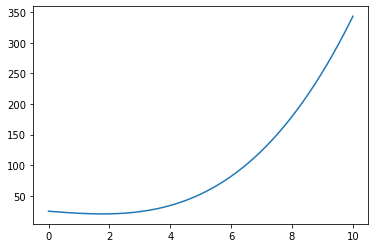

In [21]:
xs = np.linspace(0,10,200)
ys = obj(xs)
plt.plot(xs,ys)

In [29]:
print('Flow on the link is {:.3f}.'.format(sol.x[0]))

Flow on the link is 1.766.


### Problem 3

Formulate the problem of equilibrium with mode split when the logit model is given by:

$\hat{q}_{rs} = \bar{q}_{rs} \frac{1}{1+exp(\theta_1+\theta_2(\hat{u}_{rs}-u_{rs}))}$

Assume that the bus mode operates on dedicated paths and doesn't experience congestion. Suggest an interpretation of the parameters of the logit function.

$\because \space \hat{q}_{rs} = \bar{q}_{rs} \frac{1}{1+exp(\theta_1+\theta_2(\hat{u}_{rs}-u_{rs}))}$
$, \space \therefore \space u_{rs}(q_{rs}) = \frac{1}{\theta_2}[ln(\frac{\bar{q}_{rs}}{q_{rs}}-1)+\theta_1]+\hat{u}_{rs}$

$W(\hat{q}_{rs}) = u(\bar{q}_{rs}-\hat{q}_{rs}) = \frac{1}{\theta_2}[ln(\frac{\hat{q}_{rs}}{\bar{q}_{rs}-\hat{q}_{rs}})+\theta_1]+\hat{u}_{rs}$

Formulation is below:

$min \space z(x,\hat{q}) = \Sigma_{a} \int_{0}^{x_a} t_a(\omega)d\omega + \Sigma_{rs} \int_{0}^{\hat{q}_{rs}} \frac{1}{\theta_2}[ln(\frac{\omega}{\bar{q}_{rs}-\omega})+\theta_1]+\hat{u}_{rs} d\omega$

$s.t.$

$\Sigma_{k} f_k^{rs} + \hat{q}_{rs} = \bar{q}_{rs}, \forall r,s$

$f_k^{rs} \geq 0, \forall k,r,s$

$x_a = \Sigma_{rs} \Sigma_{k} f_k^{rs}\delta_{ak}^{rs}, a\in A$

Now, we can interpret the meaning of $\theta_1$ and $\theta_2$.

$\frac{\partial{\hat{q}_{rs}}}{\partial{\theta_1}} = -\hat{q}_{rs}\frac{exp(\theta_1+\theta_2(\hat{u}_{rs}-u_{rs}))}{(1+exp(\theta_1+\theta_2(\hat{u}_{rs}-u_{rs})))^2} < 0$

From the above function, we can see the demand of bus service is monnotonically decreasing in resepct of $\theta_1$, which is reasonable. $\theta_1$ is the difference of utility function when the travel time is neglected. One of examples is the price of buses. The demand of buses decreases when the price grows up.

We can regard $\theta_2$ as the sensitivity to the travel time difference. The travel time difference is determined by $u_{rs}$ since the travel time on dedicared bus lanes should be a constant. The demand of buses increases while $u_{rs}$ is growing up.